$\underline{GRAPHS} $

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from collections import deque
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [2]:

def create_random_graph(n: int, p: float) -> nx.Graph:
    """
    Creates a random graph with n nodes and p probability of connection between nodes.
    """
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                G.add_edge(i, j)
    return G
G = create_random_graph(10, 0.2)

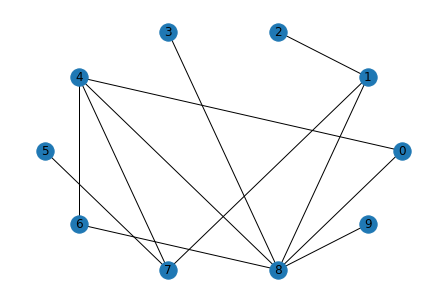

In [3]:
def plot_graph_representation(G: nx.Graph):
    """
    Show a plot of the graph. The shape of graph is a regular polygon.
    """
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()


plot_graph_representation(G)


### $BFS\&DFS \hspace{0.2cm} algorithm$

In [4]:
def BFS(G: nx.Graph, vert: int) -> dict:
    visited = {}
    queue = deque()
    visited[vert] = 0
    queue.append((vert, 0))
    while queue:
        vert, depth = queue.popleft()
        #acces to the neighbors of the vertex
        for v in G[vert]:
            if v not in visited:
                visited[v] = depth + 1
                queue.append((v, depth + 1))
    return visited

def DFS(G: nx.Graph, vert: int) -> set:
    visited = set()
    stack = []
    visited.add(vert)
    stack.append(vert)
    while stack:
        vert = stack.pop()
        for v in G[vert]:
            if v not in visited:
                visited.add(v)
                stack.append(v)
    return visited

#show the result of BFS
print(BFS(G, 4))
#show the result of DFS
print(DFS(G, 0))    

{4: 0, 0: 1, 6: 1, 7: 1, 8: 1, 1: 2, 5: 2, 3: 2, 9: 2, 2: 3}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


### $Bidirectional\hspace{0.2cm} BFS$


In [5]:
def bidirectional_BFS(G: nx.Graph, vert1: int, vert2: int) -> int:
    visited1 = {}
    visited2 = {}
    queue1 = deque()
    queue2 = deque()
    visited1[vert1] = 0
    visited2[vert2] = 0
    queue1.append((vert1, 0))
    queue2.append((vert2, 0))
    while queue1 and queue2:
        vert1, depth1 = queue1.popleft()
        vert2, depth2 = queue2.popleft()
        #acces to the neighbors of the vertex
        for v in G[vert1]:
            if v not in visited1:
                visited1[v] = depth1 + 1
                queue1.append((v, depth1 + 1))
            if v in visited2:
                return visited1[v] + visited2[v]
        for v in G[vert2]:
            if v not in visited2:
                visited2[v] = depth2 + 1
                queue2.append((v, depth2 + 1))
            if v in visited1:
                return visited1[v] + visited2[v]
    return -1

#show the result of bidirectional_BFS
print(bidirectional_BFS(G, 4, 9)) 

2


### $Weighted\hspace{0.2cm}  graphs$

In [6]:
def create_directional_weighted_graph(n: int, p: float) -> nx.DiGraph:
    """
    Creates a random directional weighted graph with n nodes and p probability of connection between nodes. 
    """
    G = nx.DiGraph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(n):
            #if the node has been aready connected to the other node, we won't connect them again, to avoid bidirectional edges
            if i != j and random.random() < p and not G.has_edge(i, j) and not G.has_edge(j, i):
                G.add_edge(i, j, weight=random.randint(1, 10))
                
    return G

def create_not_directional_weighted_graph(n: int, p: float) -> nx.Graph:
    """
    Creates a random not directional weighted graph with n nodes and p probability of connection between nodes. 
    """

    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(n):
            #if the node has been aready connected to the other node, we won't connect them again, to avoid bidirectional edges
            if i != j and random.random() < p and not G.has_edge(i, j) and not G.has_edge(j, i):
                G.add_edge(i, j, weight=random.randint(1, 10))
                
    return G

def plot_weighted_graph_representation(G: nx.DiGraph):
    """
    Show a plot of the directional weighted graph. The shape of the graph is a regular polygon.
    """
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='light', node_color='lightblue', node_size=400)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

In [7]:
import heapq
def dijkstra(G: nx.DiGraph, source: int) -> dict:
    tripla = {} #vert: [distance source, visited, previus]
    pq = []
    for v in nx.nodes(G):
        tripla[v] = [float("inf"), False, None]
        if v != source:
            heapq.heappush(pq,(v, float("inf")))
    tripla[source][0] = 0
    heapq.heappush(pq,(source, 0))
    while pq:
        vert, dist = heapq.heappop(pq) 
        if not tripla[vert][1]:
            for neigh in G[vert]:
                dist_neigh = dist + G[vert][neigh]['weight']
                if tripla[neigh][0] > dist_neigh:
                    tripla[neigh] = [dist_neigh, False, vert] 
                    heapq.heappush(pq,(neigh, dist_neigh))
            tripla[vert][1] = True
    return tripla

In [8]:
G = create_directional_weighted_graph(5, 0.35)
G2 = create_not_directional_weighted_graph(5, 0.35)

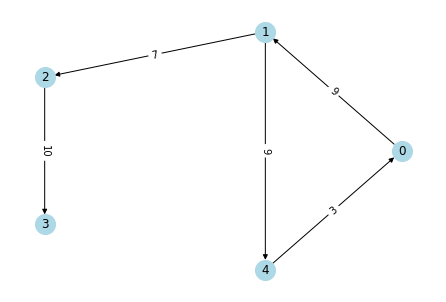

{0: [12, True, 4], 1: [0, True, None], 2: [7, True, 1], 3: [17, True, 2], 4: [9, True, 1]}


In [9]:

plot_weighted_graph_representation(G)
print(dijkstra(G, 1))


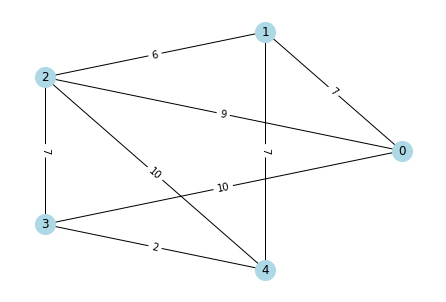

{0: [9, True, 2], 1: [6, True, 2], 2: [0, True, None], 3: [7, True, 2], 4: [9, True, 3]}


In [10]:
plot_weighted_graph_representation(G2)
print(dijkstra(G2, 2))